In [87]:
import numpy as np
import matplotlib.pyplot as plt

In [88]:
x1 = [1, -2, -1, -1, 1]
y1 = [7]
x2 = [2, -1, 2, 0, -2]
y2 = [1]
x3 = [-1, 0, 2, 2, 1]
y3 = [1] 
w0 = np.array([[0], [0], [0], [0], [0]])
u = 0.02 
steps = 200 

In [89]:
# put data points into a matrix
X = np.array([x1, x2, x3])

# put y values into a matrix 
Y = np.array([y1, y2, y3])

In [92]:
# 1b
def plot_b(w0, X, Y, steps, u):
  # weight 
  w = []
  # loss 
  loss = []
  for i in range(0, steps):
      # prediction 
      y_pred = np.dot(X, w0)
      # update weight 
      w0 = w0 - u * (2 * np.dot(X.T, (y_pred - Y)))
      w.append(w0)
      # calculate and add loss
      loss.append(np.log10(np.sum((np.dot(X, w0) - Y)**2)))
  # plot loss
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
  ax1.plot(loss)
  ax1.set_title("log(L) vs. steps")
  ax1.set_xlabel("Number of Steps")
  ax1.set_ylabel("log(L)")
  # plot each weight in each element in w vs. number of steps in one plot
  for i in range(0, 5):
    ax2.plot([w[j][i] for j in range(0, steps)])
  ax2.set_title("W vs. steps")
  ax2.set_xlabel("Number of Steps")
  ax2.set_ylabel("W")
  plt.show()

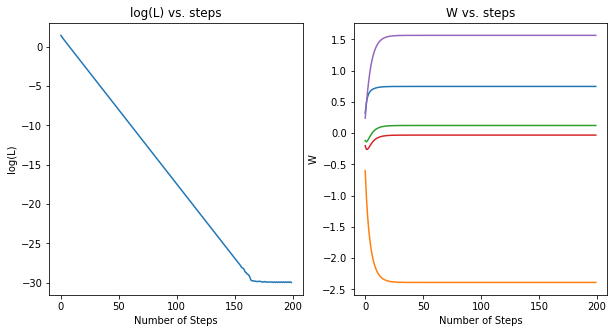

In [116]:
plot_b(w0, X, Y, steps, u)

In [119]:
# 1c
# redo 1b by pruning elements of w after every gradient descent step to ensure that the L0 norm of w is <= 2
def plot_c(w0, X, Y, steps, u):
  loss = []
  w = []
  for i in range(0, steps):
      # prediction 
      y_pred = np.dot(X, w0)
      # update weight 
      w0 = w0 - u * (2 * np.dot(X.T, (y_pred - Y)))
      # prune elements by keeping largest 2 elements
      largest = np.sort(abs(w0))[::-1][:2]
      # set all other elements not in largest to 0
      # make mask for 5 weight values
      # find second largest weight and compare values with each weight elements in mask
      mask = np.where(abs(w0)>largest[1], True, False)
      w0 = w0*mask
      # find loss
      loss.append(np.log10(np.sum((np.dot(X, w0) - Y)**2)))
      # add w0 to list
      w.append(w0)
  # plot loss
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
  ax1.plot(loss)
  ax1.set_title("log(L) vs. steps for projected gradient descent")
  ax1.set_xlabel("Number of Steps")
  ax1.set_ylabel("log(L)")
  # plot each weight in each element in w vs. number of steps in one plot
  for i in range(0, 5):
    ax2.plot([w[j][i] for j in range(0, steps)])
  ax2.set_title("W vs. steps for projected gradient descent")
  ax2.set_xlabel("Number of Steps")
  ax2.set_ylabel("W")
  plt.show()

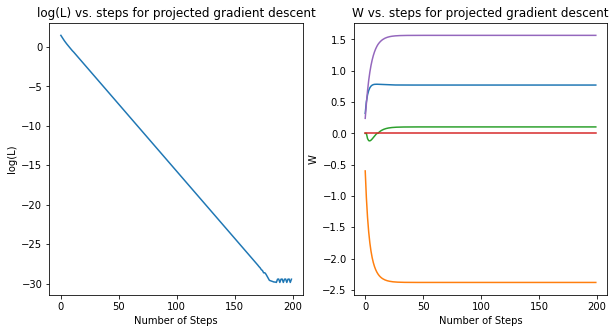

In [120]:
plot_c(w0, X, Y, steps, u)

In [123]:
# 1d
# use full-batch gradient descent to minimize loss with L1 regularization
def plot_d(w0, X, Y, steps, u, lamda):
  loss = []
  w = []
  for i in range(0, steps):
      # prediction 
      y_pred = np.dot(X, w0)
      # update weight with L1 regularization
      # l1 calcaulate sum fo abs value
      # weights are just based on after taking deriv for each w value  
      w0 = w0 - u * (2*np.dot(X.T, y_pred - Y) + (lamda * np.sign(w0)))
      # find loss
      loss.append(np.log10(np.sum((np.dot(X, w0) - Y)**2)))
      # add w0
      w.append(w0)
  # plot loss
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
  ax1.plot(loss)
  ax1.set_title("log(L) vs. steps with lambda = " + str(lamda))
  ax1.set_xlabel("Number of Steps")
  ax1.set_ylabel("log(L)")
  # plot each weight in each element in w vs. number of steps in one plot
  for i in range(0, 5):
    ax2.plot([w[j][i] for j in range(0, steps)])
  ax2.set_title("W vs. steps with lambda = " + str(lamda))
  ax2.set_xlabel("Number of Steps")
  ax2.set_ylabel("W")
  plt.show()

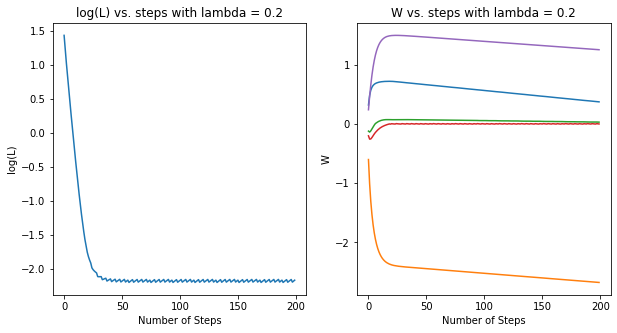

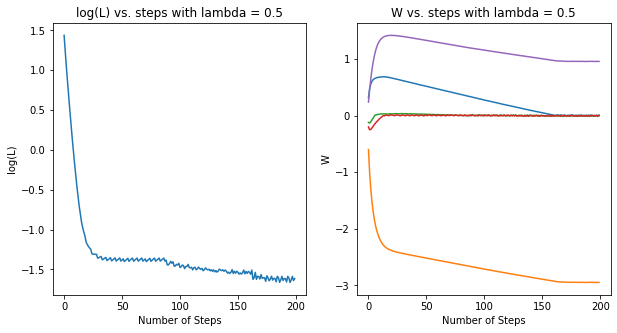

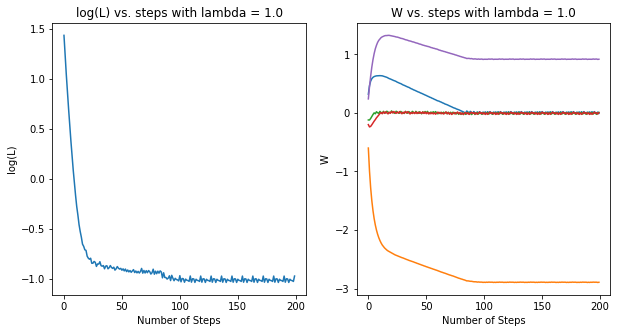

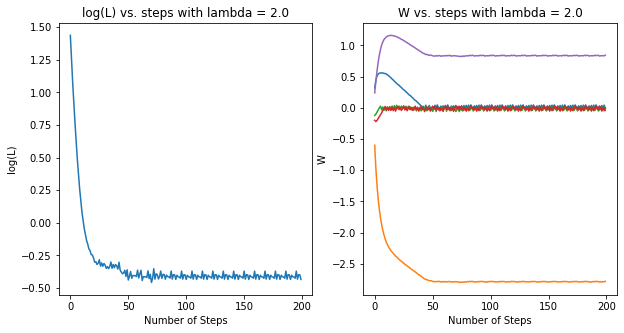

In [124]:
# plot loss and w for different lamda
lamda_lst = [0.2, 0.5, 1.0, 2.0]
for lamda in lamda_lst:
    plot_d(w0, X, Y, steps, u, lamda)

In [114]:
# 1e
def plot_e(w0, X, Y, steps, u, lamda, threshold):
  loss = []
  w = []
  for i in range(0, steps):
      # prediction 
      y_pred = np.dot(X, w0)
      # update weight with L1 regularization and soft thresholding
      # move by positive, negative or 0 lambda, use if else for threshold 
      # drop replacement for l1 regularization, advanced version of l1 regularization, don't need lambda*np.sign because soft threshold do the sma ehting)
      w0 = w0 - u * (2*np.dot(X.T, y_pred - Y))
      # if w0 > threshold, w0 = w0 - threshold
      # if w0 < -threshold, w0 = w0 + threshold
      # else w0 = 0
      conditions = [w0 > threshold, w0 < -threshold, np.abs(w0) <= threshold]
      choices = [w0 - threshold, w0 + threshold, 0]
      w0 = np.select(conditions, choices)
      # find loss
      loss.append(np.log10(np.sum((np.dot(X, w0) - Y)**2)))
      # add w0
      w.append(w0)
  # plot loss
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
  ax1.plot(loss)
  ax1.set_title("log(L) with lambda = " + str(lamda) + " and t = " + str(threshold))
  ax1.set_xlabel("Number of Steps")
  ax1.set_ylabel("log(L)")
  # plot each weight in each element in w vs. number of steps in one plot
  for i in range(0, 5):
    ax2.plot([w[j][i] for j in range(0, steps)])
  ax2.set_title("W with lambda = " + str(lamda) + " and t = " + str(threshold))
  ax2.set_xlabel("Number of Steps")
  ax2.set_ylabel("W")
  plt.show()

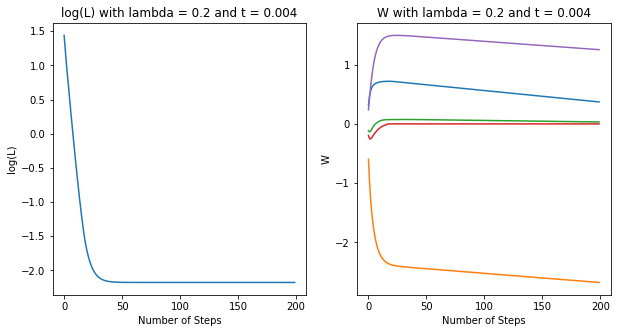

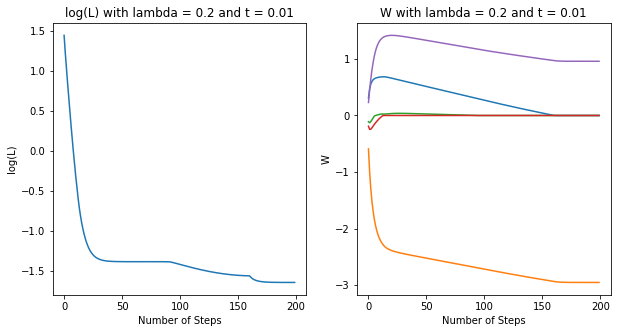

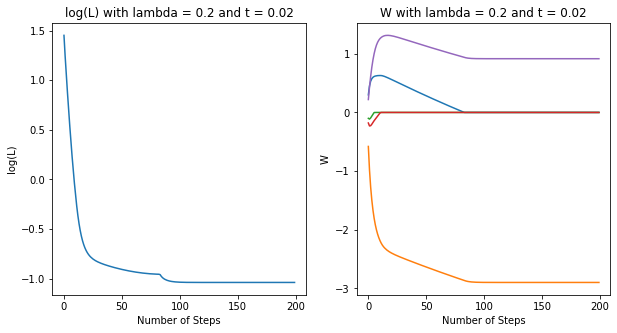

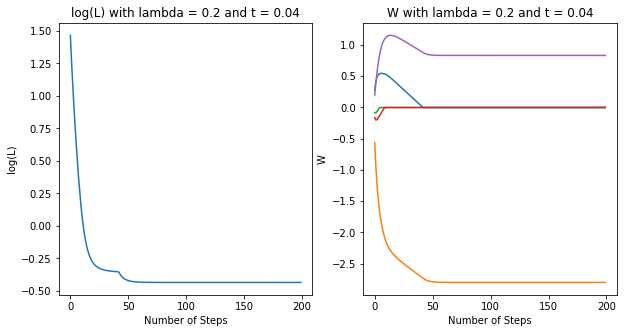

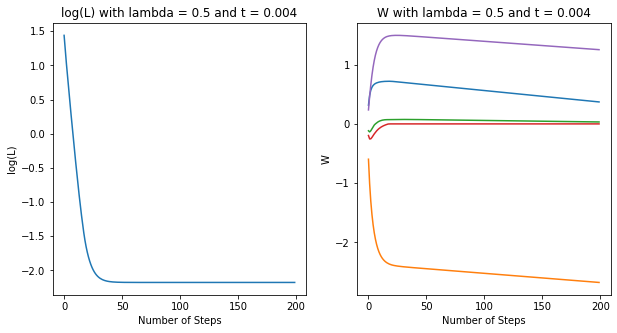

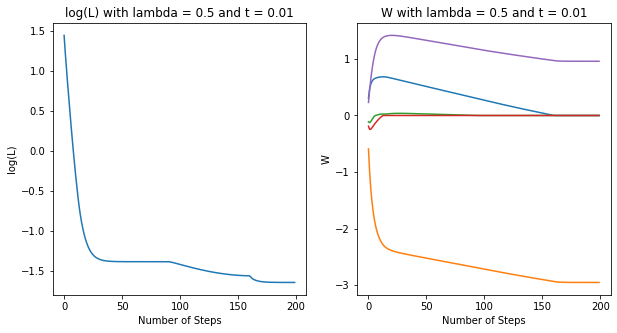

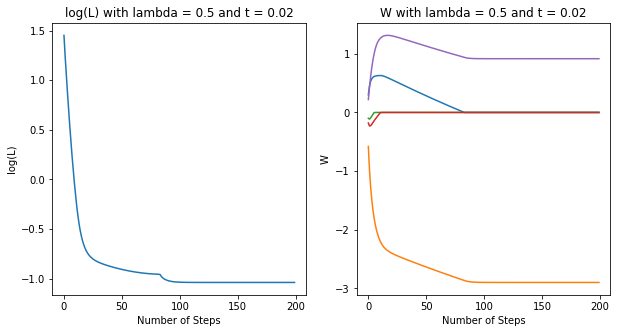

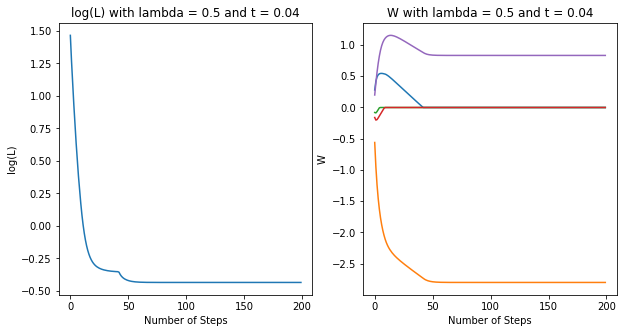

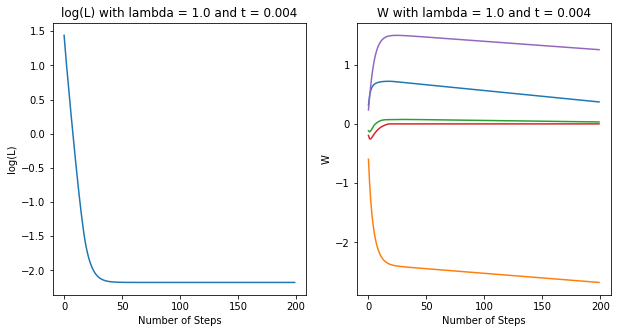

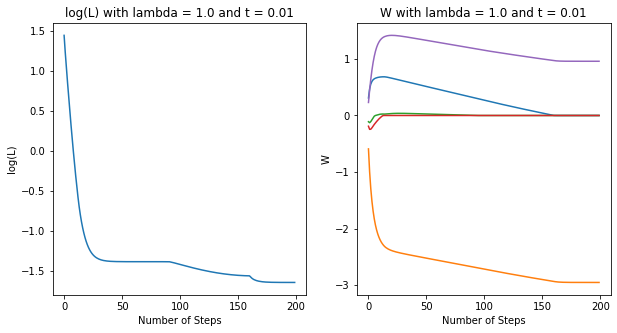

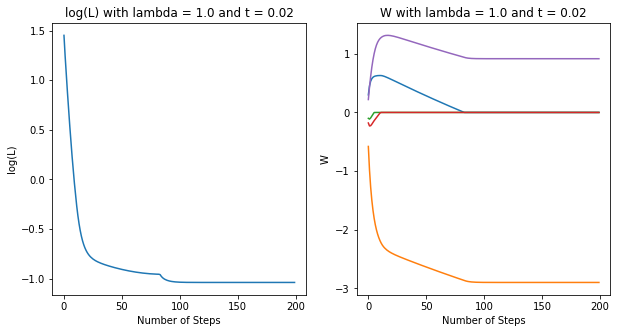

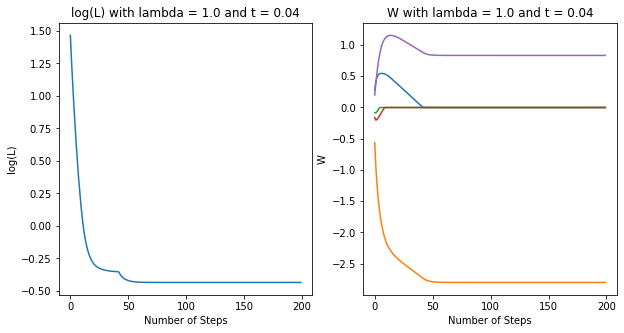

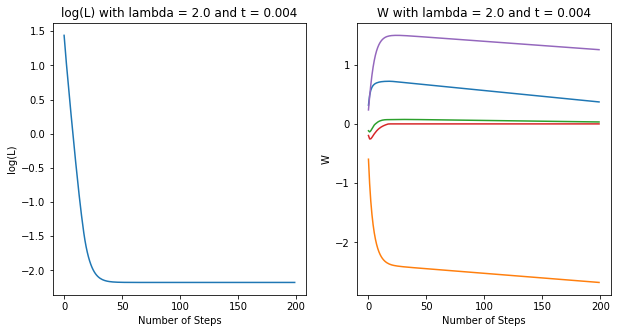

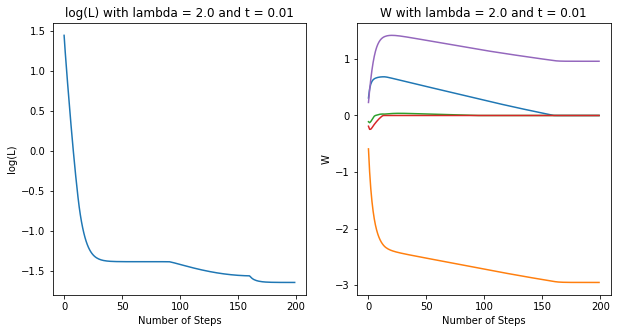

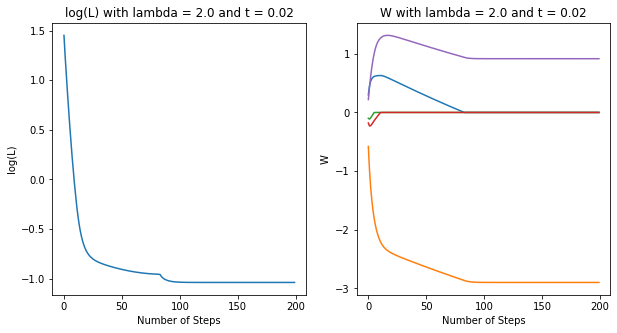

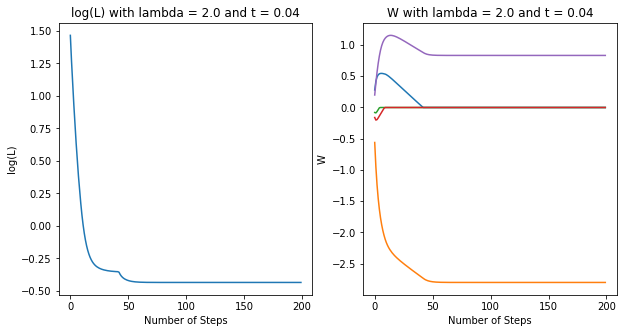

In [125]:
# plot loss and w for different lamda and threshold
lamda_lst = [0.2, 0.5, 1.0, 2.0]
threshold = [0.004, 0.01, 0.02, 0.04]
for l in lamda_lst:
    for t in threshold:
      plot_e(w0, X, Y, steps, u, l, t)

In [126]:
# 1f 
# apply trimmed L1 regularization to the same objective as 1d
# applying a l1 regularization with strength λ on the 3 elements of W with the smallest absolute value, with no penalty on other elements.
# Minimize L+λTl1(W) using proximal gradient update with λ = {1.0, 2.0, 5.0, 10.0} (correspond the soft thresholding threshold {0.02, 0.04, 0.1, 0.2})
def plot_f(w0, X, Y, steps, u, lamda, threshold):
  loss = []
  w = []
  for i in range(0, steps):
      # prediction 
      y_pred = np.dot(X, w0)
      # update weight 
      w0 = w0 - u * (2*np.dot(X.T, y_pred - Y))
      # update weight with trimmed L1 regularization on 3 elements of W with smallest absolute value and soft thresholding
      # trim first, apply L1 regularization on 3 elements of W with smallest absolute value
      smallest = np.sort(np.abs(w0))[0:3]
      # loop through w0, if w0 is in smallest, apply soft thresholding
      for j in range(0, len(w0)):
          if w0[j] in smallest:
              # if w0 > threshold, w0 = w0 - threshold
              # if w0 < -threshold, w0 = w0 + threshold
              # if abs(w0) <= threshold, w0 = 0
              conditions = [w0[j] > threshold, np.abs(w0[j]) <= threshold,w0[j] < -threshold]
              choices = [w0[j] - threshold, 0, w0[j] + threshold]
              w0[j] = np.select(conditions, choices)
      # find loss
      loss.append(np.log10(np.sum((np.dot(X, w0) - Y)**2)))
      # add w
      w.append(w0)
  # plot loss
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
  ax1.plot(loss)
  ax1.set_title("log(L) with lambda = " + str(lamda) + " and t = " + str(threshold))
  ax1.set_xlabel("Number of Steps")
  ax1.set_ylabel("log(L)")
  # plot each weight in each element in w vs. number of steps in one plot
  for i in range(0, 5):
    ax2.plot([w[j][i] for j in range(0, steps)])
  ax2.set_title("W with lambda = " + str(lamda) + " and t = " + str(threshold))
  ax2.set_xlabel("Number of Steps")
  ax2.set_ylabel("W")
  plt.show()

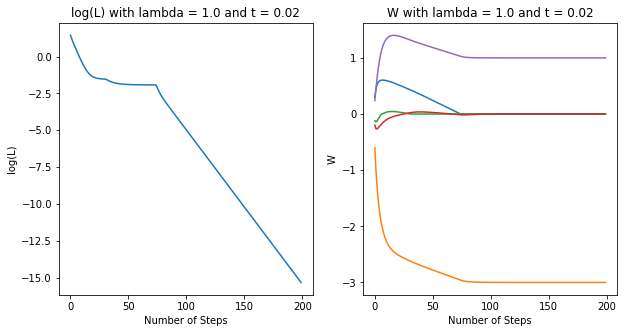

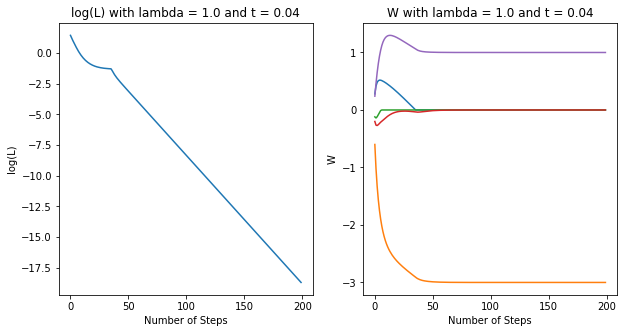

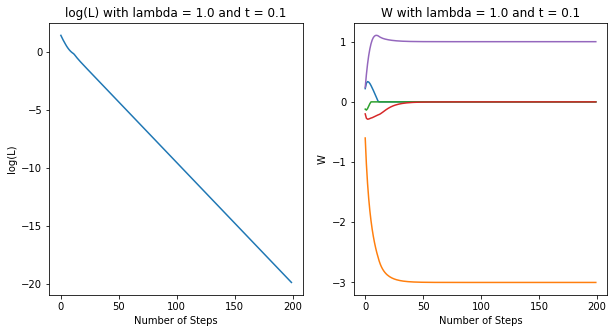

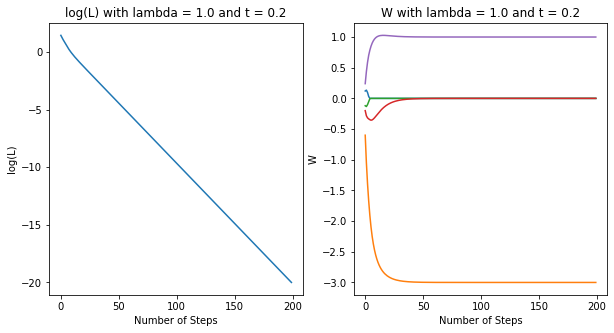

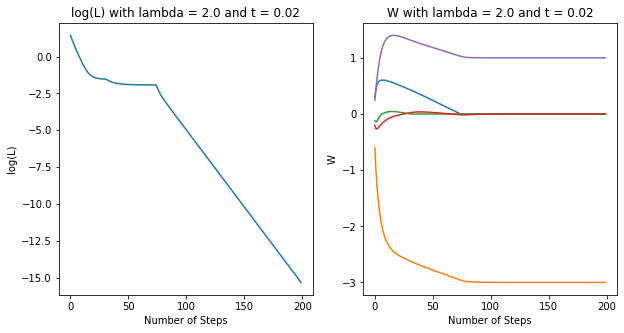

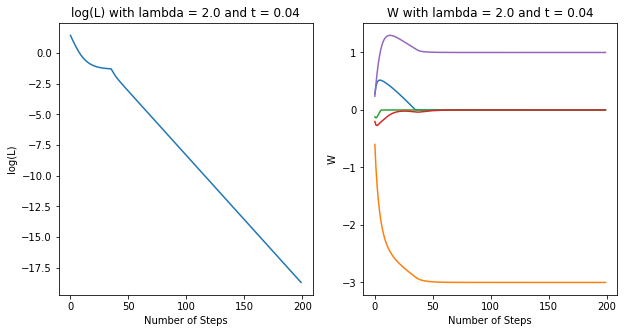

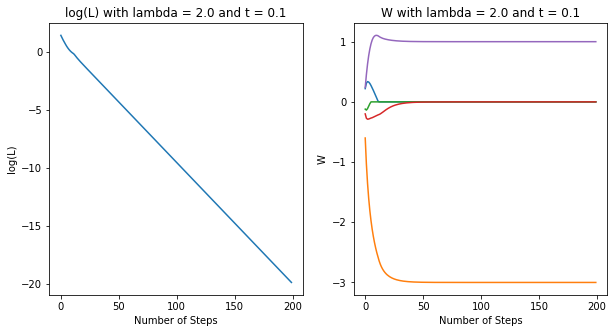

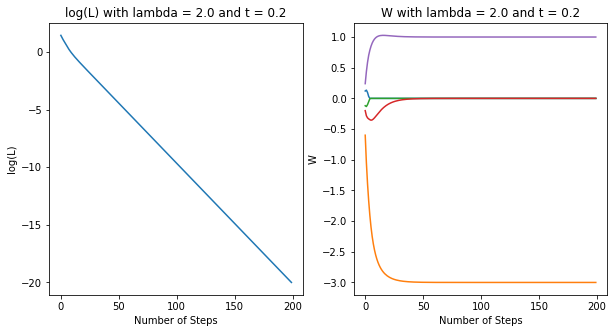

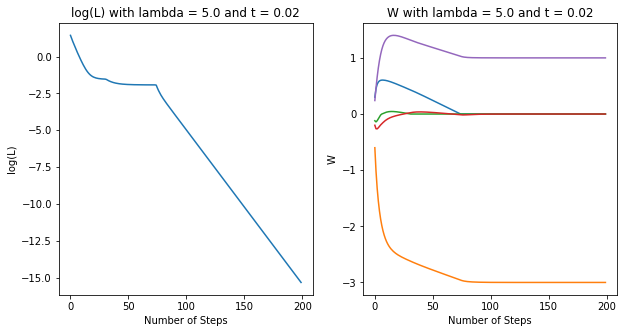

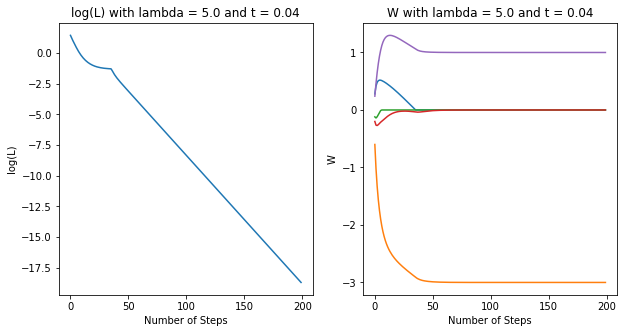

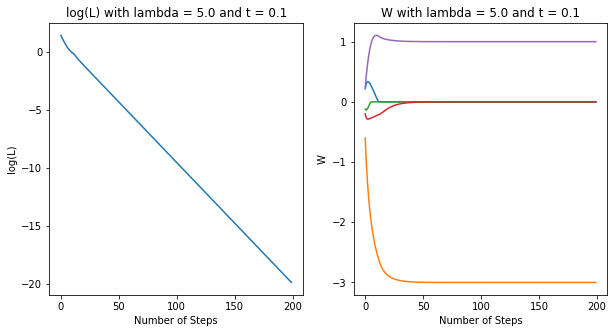

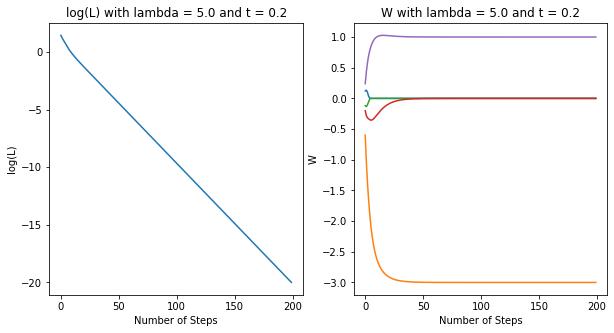

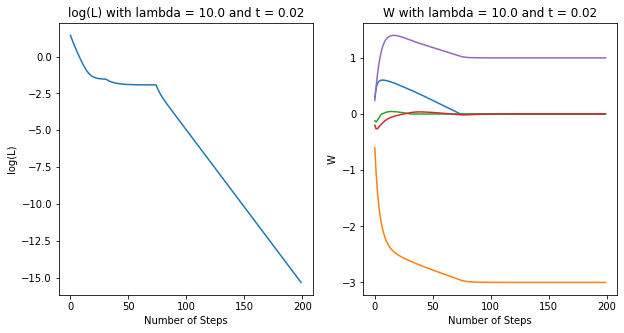

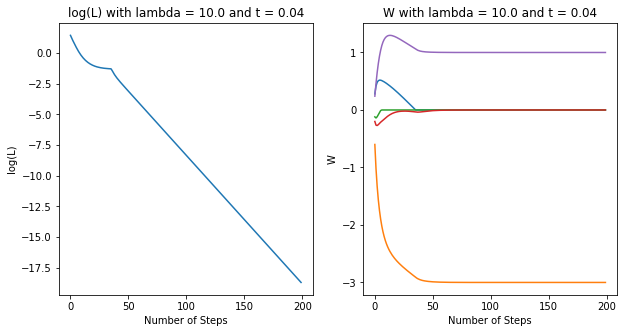

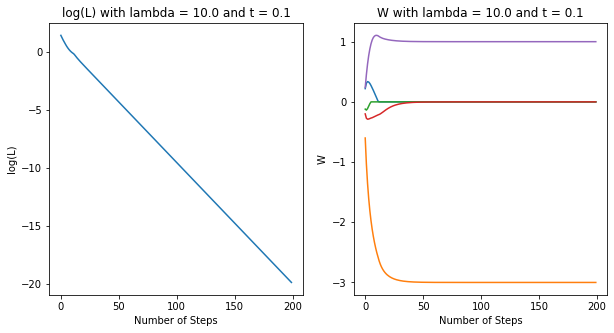

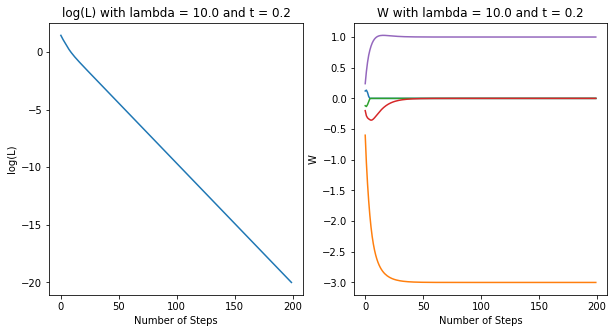

In [127]:
# plot loss and w for different lamda and threshold
thresholds = [0.02, 0.04, 0.1, 0.2]
lambdas = [1.0, 2.0, 5.0, 10.0]
for lamda in lambdas:
    for threshold in thresholds:
        plot_f(w0, X, Y, steps, u, lamda, threshold)